In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [3]:
print("Customers Data:")
print(customers.info())
print(customers.head(), "\n")

Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 



In [4]:
print("Products Data:")
print(products.info())
print(products.head(), "\n")

Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 



In [5]:
print("Transactions Data:")
print(transactions.info())
print(transactions.head(), "\n")

Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2

In [6]:
print("Missing values in Customers:\n", customers.isnull().sum(), "\n")
print("Missing values in Products:\n", products.isnull().sum(), "\n")
print("Missing values in Transactions:\n", transactions.isnull().sum(), "\n")


Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [7]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [8]:
print("Duplicates in Customers:", customers.duplicated().sum())
print("Duplicates in Products:", products.duplicated().sum())
print("Duplicates in Transactions:", transactions.duplicated().sum(), "\n")

Duplicates in Customers: 0
Duplicates in Products: 0
Duplicates in Transactions: 0 



In [9]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [10]:
print("Merged Data Info:")
print(merged_data.info())
print(merged_data.head(), "\n")

Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ K

In [11]:
# 1. Total Sales Overview
total_sales = merged_data['TotalValue'].sum()
print(f"Total Sales: ${total_sales}")

Total Sales: $689995.56


In [13]:
# 2. Sales by Region
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nSales by Region:")
print(sales_by_region)


Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


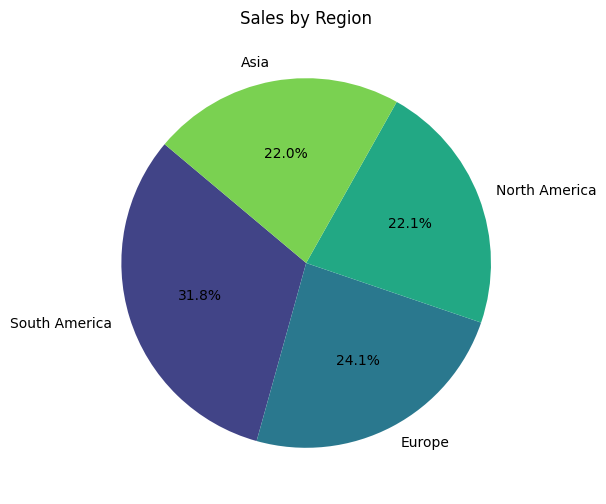

In [25]:
# Visualize Sales by Region using Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sales_by_region.values, labels=sales_by_region.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(sales_by_region)))
plt.title("Sales by Region")
plt.show()

In [15]:
# 3. Top-Selling Products
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Sales:")
print(top_products)


Top 10 Products by Sales:
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


<ipython-input-16-d8094d916d69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")


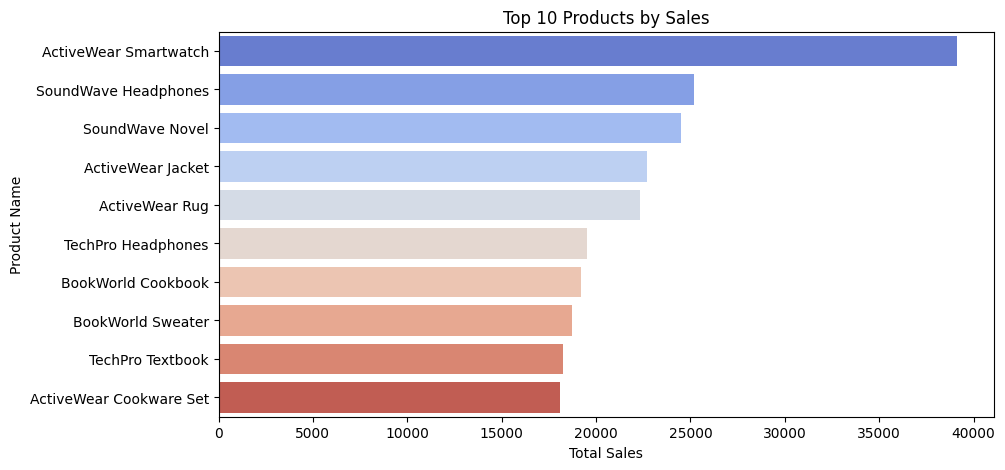

In [16]:
# Visualize Top-Selling Products
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()

In [17]:
# 4. Sales Trends Over Time
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('TransactionMonth')['TotalValue'].sum()

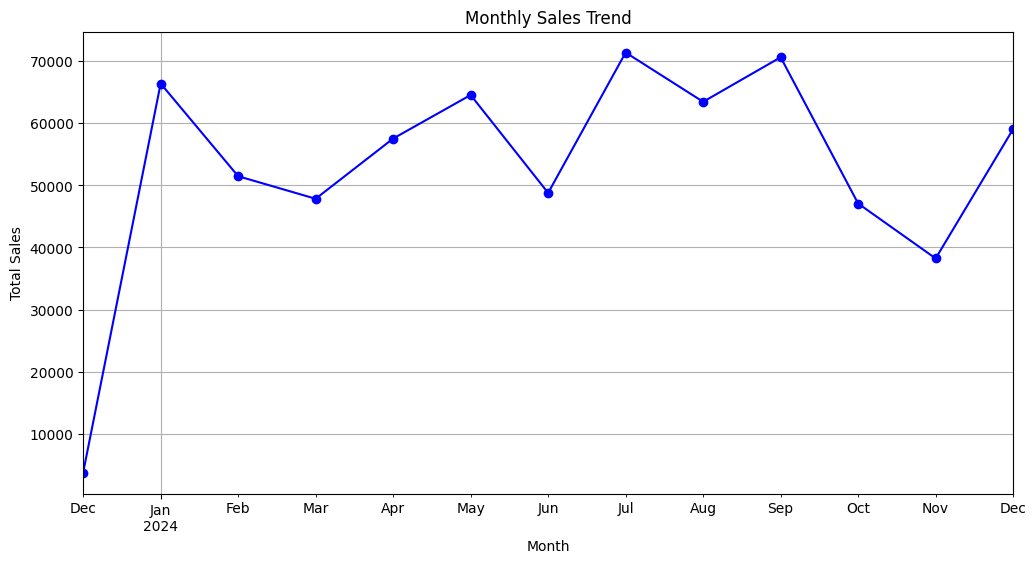

In [18]:
# Visualize Monthly Sales Trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

In [19]:
# 5. Customer Analysis
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Sales:")
print(top_customers)


Top 10 Customers by Sales:
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


<ipython-input-20-e2f81e9e648a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="plasma")


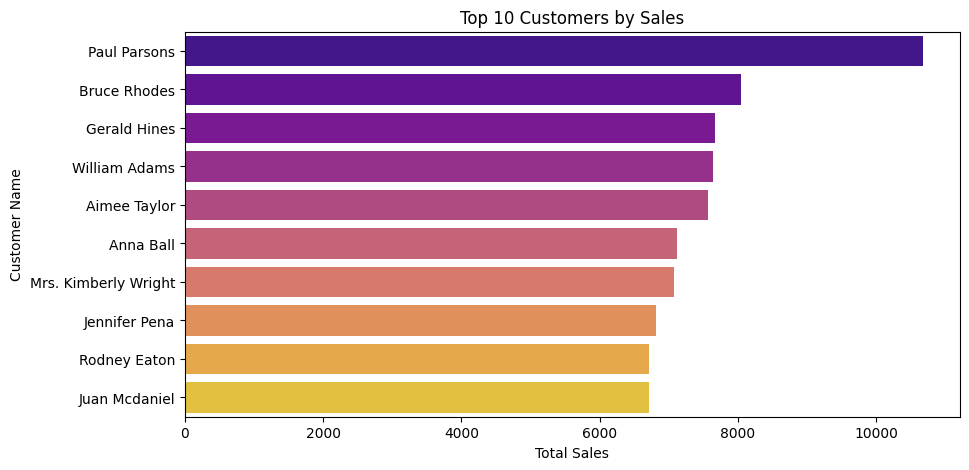

In [20]:
# Visualize Top Customers
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="plasma")
plt.title("Top 10 Customers by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Customer Name")
plt.show()

In [21]:
# 6. Product Category Analysis
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nSales by Product Category:")
print(category_sales)


Sales by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


<ipython-input-22-802e3c0c5f0f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="magma")


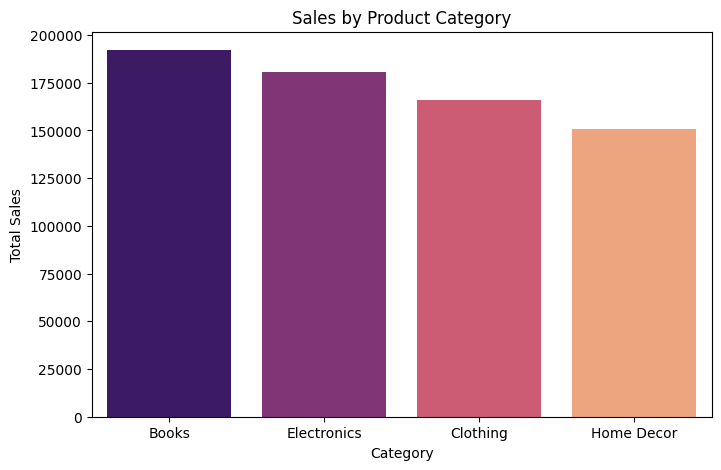

In [22]:
# Visualize Sales by Category
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="magma")
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

In [23]:
# Derive Business Insights
print("\nBusiness Insights:")
print("1. The highest sales are from the region:", sales_by_region.idxmax())
print("2. The top-selling product is:", top_products.idxmax())
print("3. Monthly sales trend shows peak sales in:", monthly_sales.idxmax())
print("4. The customer contributing the most to sales is:", top_customers.idxmax())
print("5. The most profitable product category is:", category_sales.idxmax())


Business Insights:
1. The highest sales are from the region: South America
2. The top-selling product is: ActiveWear Smartwatch
3. Monthly sales trend shows peak sales in: 2024-07
4. The customer contributing the most to sales is: Paul Parsons
5. The most profitable product category is: Books


In [26]:
merged_data.to_csv("Merged_eCommerce_Data.csv", index=False)